<a href="https://colab.research.google.com/github/BiancaStadl/Bachelorarbeit/blob/main/2021_11_30_working_distil_multi_BERT_Huggingface_input_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/distilbert-base-german-cased

https://huggingface.co/transformers/model_doc/distilbert.html 
DistilBERT doesn’t have token_type_ids, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token (or [SEP]).

und die zwei defs (convert_input_examples_to_tf_dataset und convert_...to_inputE..) sind von https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671


https://medium.com/geekculture/hugging-face-distilbert-tensorflow-for-custom-text-classification-1ad4a49e26a7

https://towardsdatascience.com/hugging-face-transformers-fine-tuning-distilbert-for-binary-classification-tasks-490f1d192379

In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoConfig

In [ ]:
# #https://huggingface.co/transformers/model_doc/auto.html#autoconfig
# # Download configuration from huggingface.co and cache.
# config = AutoConfig.from_pretrained('distilbert-base-german-cased')

# # Change some config attributes when loading a pretrained config.
# config = AutoConfig.from_pretrained('distilbert-base-german-cased', dropout=0.2, attention_dropout=0.2)

# #config = GermanBertConfig(dropout=0.2, attention_dropout=0.2)
# config.output_hidden_states = False

# #unter -> use in transformers 
# #https://huggingface.co/distilbert-base-german-cased/tree/main

  
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-german-cased")

# model = AutoModelForMaskedLM.from_pretrained("distilbert-base-german-cased")

In [ ]:
#model.summary()

In [ ]:
#!pip install transformers 
from transformers import DistilBertTokenizerFast
#distilbert-base-german-cased,distilbert-base-multilingual-cased

# Instantiate DistilBERT tokenizer...Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-multilingual-cased')
##Achtung: but the distilbert-base-multilingual-cased model throws an exception during training -> siehe https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed
#direkt von https://towardsdatascience.com/hugging-face-transformers-fine-tuning-distilbert-for-binary-classification-tasks-490f1d192379

In [ ]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.4
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
#distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', config=config)

#DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

# Make DistilBERT layers untrainable
#for layer in distilBERT.layers:
 #   layer.trainable = False


model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
#von https://github.com/huggingface/transformers/tree/master/examples/research_projects/distillation

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
from keras import losses
from tensorflow import keras 
from keras import optimizers 
from keras import metrics 

In [ ]:
url = "https://github.com/uds-lsv/GermEval-2018-Data/archive/master.zip"

dataset = tf.keras.utils.get_file("GermEval-2018-Data-master.zip", url, 
                                   extract=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'GermEval-2018-Data-master')


In [ ]:
training_file = os.path.join(dataset_dir, 'germeval2018.training.txt')
#with open(training_file) as f:
 # print(f.read())

#print()

testing_file = os.path.join(dataset_dir, 'germeval2018.test.txt')

In [ ]:
def remove_clutter(string):
   string = re.sub("@[^\s]+"," ",string)
   string = re.sub("#[^\s]+"," ", string)
   string = re.sub("\u00a9"," ", string)
   string = re.sub("\u00ae"," ", string)
   string = re.sub("[\u2000-\u3300]"," ", string)
   string = re.sub("\ud83c[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83d[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83e[\ud000-\udfff]"," ", string)
   string = re.sub("😜", " ",string)
   string = re.sub("🍫", " ",string)
   string = re.sub("😁", " ",string)
   string = re.sub("🐖", " ",string)
   string = re.sub("😡", " ",string)
   string = re.sub("😇", " ",string)
   string = re.sub("😬", " ",string)
   string = re.sub("😃", " ",string)
   string = re.sub("😂", " ",string)
   string = re.sub("💙", " ",string)  
   string = re.sub("😛", " ",string)
   string = re.sub("🙏", " ",string)
   string = re.sub("👍", " ",string)
   string = re.sub("🖕", " ",string)
   string = re.sub("😉", " ",string)
   string = re.sub("💩", " ",string)
   string = re.sub("🤢", " ",string)
   string = re.sub("👏", " ",string)
   string = re.sub("😨", " ",string)
   string = re.sub("🤣", " ",string)
   string = re.sub("🤡", " ",string)
   string = re.sub("😈", " ",string)
   string = re.sub("💃🏽", " ",string)
   string = re.sub("👹", " ",string)
   string = re.sub("🤘", " ",string)
   string = re.sub("😱", " ",string)
   string = re.sub("🤔", " ",string) 
   string = re.sub("🌈", " ",string) 
   string = re.sub("💕", " ",string) 
   string = re.sub("👩‍❤️‍👩", " ",string) 
   string = re.sub("😍", " ",string) 
   string = re.sub("👆", " ",string) 
   string = re.sub("😖", " ",string) 
   string = re.sub("👇", " ",string) 
   string = re.sub("🔥", " ",string) 
   string = re.sub("😘", " ",string) 
   string = re.sub("🎉", " ",string) 
   string = re.sub("🤬", " ",string) 
   string = re.sub("👊", " ",string)
   string = re.sub("🇩🇪", " ",string)  
   string = re.sub("💔", " ",string)
   string = re.sub("🙈", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🐟", " ",string)
   string = re.sub("🛶", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😓", " ",string)
   string = re.sub("😳", " ",string)
   string = re.sub("🚀", " ",string)
   string = re.sub("👎", " ",string)
   string = re.sub("😎", " ",string)
   string = re.sub("🐸", " ",string)
   string = re.sub("📈", " ",string)
   string = re.sub("🙂", " ",string)
   string = re.sub("😅", " ",string)
   string = re.sub("😆", " ",string)
   string = re.sub("🙎🏿", " ",string)
   string = re.sub("👎🏽", " ",string)
   string = re.sub("🤭", " ",string)
   string = re.sub("😤", " ",string)
   string = re.sub("😚", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😲", " ",string)
   string = re.sub("🤮", " ",string)
   string = re.sub("🙄", " ",string)
   string = re.sub("🤑", " ",string)
   string = re.sub("🎅", " ",string)
   string = re.sub("👋", " ",string)
   string = re.sub("💪", " ",string)
   string = re.sub("😄", " ",string)
   string = re.sub("🧐", " ",string)
   string = re.sub("😠", " ",string)
   string = re.sub("🎈", " ",string)
   string = re.sub("🚂", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("🚇", " ",string)
   string = re.sub("🚊", " ",string)
   string = re.sub("🤷", " ",string)
   string = re.sub("😥", " ",string)
   string = re.sub("🙃", " ",string)
   string = re.sub("🔩", " ",string)
   string = re.sub("🔧", " ",string)
   string = re.sub("🔨", " ",string)
   string = re.sub("🛠", " ",string)
   string = re.sub("💓", " ",string)
   string = re.sub("💡", " ",string)
   string = re.sub("🍸", " ",string)
   string = re.sub("🥃", " ",string)
   string = re.sub("🥂", " ",string)
   string = re.sub("😷", " ",string)
   string = re.sub("🤐", " ",string)
   string = re.sub("🌎", " ",string)
   string = re.sub("👑", " ",string)
   string = re.sub("🤛", " ",string)
   string = re.sub("😀", " ",string)
   string = re.sub("🛤", " ",string)
   string = re.sub("🎄", " ",string)
   string = re.sub("📴", " ",string)
   string = re.sub("🌭", " ",string)
   string = re.sub("🤕", " ",string)
   string = re.sub("😭", " ",string)
   string = re.sub("🍾", " ",string)
   string = re.sub("🍞", " ",string)
   string = re.sub("🤦", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🕯️", " ",string)

   string = re.sub("OTHER|OFFENSE|ABUSE|INSULT"," ",string)
   return string

In [ ]:
statementsForTraining = []
sentimentsForTraining = []

fileToRead = open(training_file, 'r')

while True:
  #next line in file
  line = fileToRead.readline()

  if line == "":
   break

  findSentiment = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)
      

  statementsForTraining.append(line)

  if findSentiment.group(0) == "OTHER":  
    sentimentsForTraining.append(0)
  else:
    sentimentsForTraining.append(1)

  if not line:
    break

 #print("{}: {}".format(count,line.strip()))
  
 # print(sentiment.group(0))
 
fileToRead.close()

training_sentences = statementsForTraining
training_labels = sentimentsForTraining

#print(training_sentences[0:100])
#print(training_labels[9])  

In [ ]:

statementsForTesting = []
sentimentsForTesting = []

fileToRead = open(testing_file, 'r')

while True:
 
  line = fileToRead.readline()

  if line == "":
   break

  sent = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)


  statementsForTesting.append(line)
  #print(len(line))

  if sent.group(0) == "OTHER": 
    sentimentsForTesting.append(0)
  else:
    sentimentsForTesting.append(1)

  if not line:
    break


fileToRead.close()


testing_sentences = statementsForTesting
testing_labels = sentimentsForTesting
#print(len(testing_sentences))
#print(testing_sentences)   
#print(statementsForTesting)

In [ ]:
import pandas as pd
train_dataframe = pd.DataFrame({'tweet': training_sentences, 'predictions': training_labels}, columns=['tweet', 'predictions'])
test_dataframe = pd.DataFrame({'tweet':testing_sentences, 'predictions': testing_labels}, columns=['tweet', 'predictions'])

In [ ]:
from transformers import InputExample, InputFeatures

folgende zwei defs von https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671

In [ ]:
def convert_sentences_to_input_example(train, test,DATA, LABEL):
    training_input_examples = train.apply(lambda x: InputExample(guid=None,
                                                                 text_a=x[DATA],
                                                                 text_b=None,
                                                                 label =x[LABEL]),axis=1)
    
    testing_input_examples = test.apply(lambda x: InputExample(guid=None,
                                                               text_a=x[DATA],
                                                               text_b=None,
                                                               label = x[LABEL]),axis=1)
    
    return training_input_examples,testing_input_examples

In [ ]:
def convert_input_examples_to_tf_dataset(examples, tokenizer, max_length=60):
    features = []

    for ex in examples:
        input_dict = tokenizer.encode_plus(
            ex.text_a,
            add_special_tokens=True,
            max_length=max_length,
            return_token_type_ids= False,
            return_attention_mask=True,
            pad_to_max_length=True,
            truncation=True
        )
        input_ids, attention_mask=(input_dict["input_ids"],input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask,label=ex.label
            )
        )
    
    def gen():
        for f in features:
            yield(
                {
                    "input_ids":f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )




In [ ]:

DATA = 'tweet'
LABEL = 'predictions'

In [ ]:
train_input_examples, test_input_examples = convert_sentences_to_input_example(train_dataframe, test_dataframe,DATA, LABEL)

training_data = convert_input_examples_to_tf_dataset(list(train_input_examples),tokenizer)
test_data = convert_input_examples_to_tf_dataset(list(test_input_examples),tokenizer)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
training_data = training_data.shuffle(100).batch(32).repeat(2)
test_data = test_data.batch(32)

In [ ]:
#type(train_input_examples)
type(training_data)

tensorflow.python.data.ops.dataset_ops.RepeatDataset

In [ ]:
!pip install -q tf-models-official
from official.nlp import optimization

In [ ]:
#achtung, alles von https://towardsdatascience.com/hugging-face-transformers-fine-tuning-distilbert-for-binary-classification-tasks-490f1d192379
params = {'MAX_LENGTH': 60,
          'EPOCHS':36,
          'LEARNING_RATE': 5e-5,
          'FT_EPOCHS': 6,
          'OPTIMIZER': 'adam',
          'FT_LEARNING_RATE': 2e-5,
          'BATCH_SIZE': 32,
          'NUM_STEPS': 64,#len(training_sentences.index) // 
          'DISTILBERT_DROPOUT': 0.4,
          'DISTILBERT_ATT_DROPOUT': 0.2,
          'LAYER_DROPOUT': 0.2,
          'KERNEL_INITIALIZER': 'GlorotNormal',
          'BIAS_INITIALIZER': 'zeros',
          'POS_PROBA_THRESHOLD': 0.5,          
          'ADDED_LAYERS': 'Dense 256, Dense 32, Dropout 0.2',
          'LR_SCHEDULE': '5e-5 for 6 epochs, Fine-tune w/ adam for 6 epochs @2e-5',
          'FREEZING': 'All DistilBERT layers frozen for 6 epochs, then unfrozen for 6',
          'CALLBACKS': '[early_stopping monitoring val_loss w/ patience=0]',
          'RANDOM_STATE':42
          }

In [ ]:
#Wichtig: alles hier von https://towardsdatascience.com/hugging-face-transformers-fine-tuning-distilbert-for-binary-classification-tasks-490f1d192379
MAX_LENGTH = 128
LAYER_DROPOUT = 0.2
LEARNING_RATE = 5e-5
RANDOM_STATE = 42

#unverändert..
def build_model(transformer, max_length=60):

 #   Template for building a model off of the BERT or DistilBERT architecture
  #  for a binary classification task.
   # 
    #Input:
     # - transformer:  a base Hugging Face transformer model object (BERT or DistilBERT)
      #                with no added classification head attached.
      #- max_length:   integer controlling the maximum number of encoded tokens 
       #               in a given sequence.
    #
    #Output:
     # - model:        a compiled tf.keras.Model with added classification layers 
      #                on top of the base pre-trained model architecture.

    
    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=params['RANDOM_STATE']) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='attention_mask', 
                                                  dtype='int32')
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, which is located
    # at index 0.  Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    D1 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(cls_token)
    
    X = tf.keras.layers.Dense(256,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D1)
    
    D2 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(X)
    
    X = tf.keras.layers.Dense(32,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D2)
    
    D3 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(X)
    
    # Define a single node that makes up the output layer (for binary classification)
    output = tf.keras.layers.Dense(1, 
                                   activation='sigmoid',
                                   kernel_initializer=weight_initializer,  # CONSIDER USING CONSTRAINT
                                   bias_initializer='zeros'
                                   )(D3)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(lr=params['LEARNING_RATE']), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
distil_model = build_model(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#noch mehr Parameter fürs Fit verwenden.
distil_model.fit(training_data,batch_size=32, verbose=2)

314/314 - 3288s - loss: 0.4951 - accuracy: 0.7497 - 3288s/epoch - 10s/step


In [ ]:
type(test_data)
#test_data.take(5)
prediction_batch = tokenizer(testing_sentences[0:1031], max_length=60, padding=True, truncation=True, return_tensors='tf')
pred_outputs = distil_model(prediction_batch)
#true_predictions = tf.nn.softmax(pred_outputs[0], axis=-1)
true_predictions=np.round(pred_outputs)
label = tf.argmax(pred_outputs, axis=1)
label_pred = label.numpy()

In [ ]:
pred_outputs

<tf.Tensor: shape=(1031, 1), dtype=float32, numpy=
array([[0.7193253 ],
       [0.73820615],
       [0.7041536 ],
       ...,
       [0.7394777 ],
       [0.69970465],
       [0.74844575]], dtype=float32)>

In [ ]:
#testing_labels[32:63]

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=testing_labels[0:1031], y_pred=true_predictions)

In [ ]:
plot_labels = ['no hatespeech','hatespeech']

Confusion matrix, without normalization
[[  0 674]
 [  0 357]]


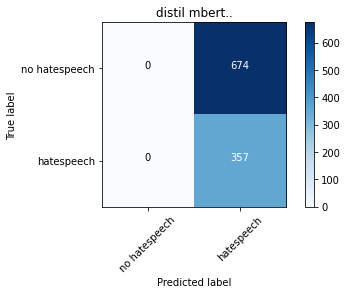

In [ ]:
plot_confusion_matrix(cm=cm, classes=plot_labels, title='distil mbert..')

In [ ]:
distil_model.evaluate(test_data)

111/111 [==============================] - 354s 3s/step - loss: 0.5816 - accuracy: 0.7537


[0.5815674662590027, 0.7536806464195251]

In [ ]:
pred = distil_model.predict(test_data)

In [ ]:
predi_round=np.round(pred)

In [ ]:
len(predi_round)

3532

In [ ]:
cm_n = confusion_matrix(y_true=testing_labels, y_pred=predi_round)

Confusion matrix, without normalization
[[2198  132]
 [ 738  464]]


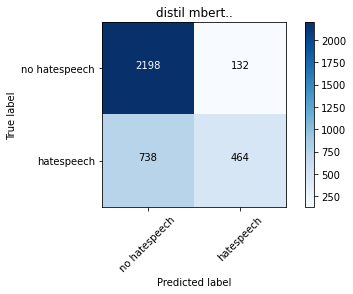

In [ ]:
plot_confusion_matrix(cm=cm_n, classes=plot_labels, title='distil mbert..')